[View in Colaboratory](https://colab.research.google.com/github/mogamin/chainer-ssd/blob/master/chainer_SSD_pascal_original_dataset_utils.ipynb)

In [3]:
# colabでのGPUメモリ,使用率を見る
#!/opt/bin/nvidia-smi

# colabで不要GPUプロセスを削除しメモリを開放する
#!apt install lsof
#!lsof /dev/nvidia*
#!ps f -o user,pgrp,pid,pcpu,pmem,start,time,command -p `lsof -n -w -t /dev/nvidia*`
#!kill -9 803
!/opt/bin/nvidia-smi

Fri Aug 31 05:20:15 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0   130W / 149W |   7155MiB / 11439MiB |    100%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

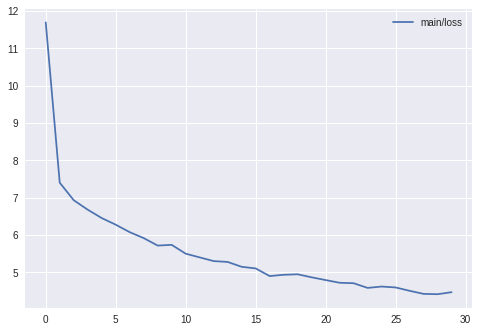

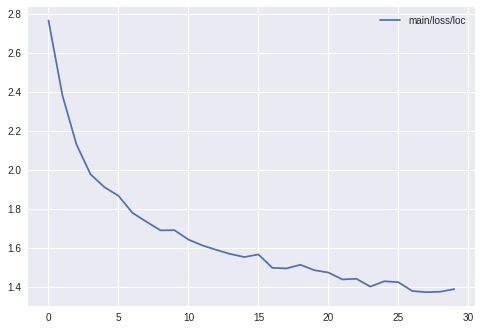

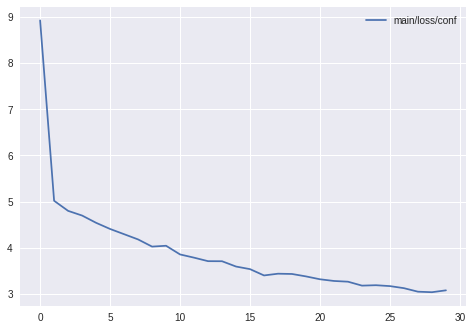

In [28]:
import json
import pandas as pd
with open('result/ssd/log') as f:
  result = pd.DataFrame(json.load(f)).interpolate()

result[['main/loss']].plot()
result[['main/loss/loc']].plot()
result[['main/loss/conf']].plot()

In [27]:
# modelの確認
!ls -lR result
#!rm -f result/ssd/model_iter_2600 result/ssd/model_iter_2700 result/ssd/model_iter_2800 result/ssd/model_iter_2400 

result:
total 4
drwxr-xr-x 2 root root 4096 Aug 31 08:53 ssd

result/ssd:
total 476300
-rw-r--r-- 1 root root     7034 Aug 31 08:49 log
-rw-r--r-- 1 root root 97541122 Aug 31 06:29 model_iter_1000
-rw-r--r-- 1 root root 97543568 Aug 31 07:08 model_iter_1500
-rw-r--r-- 1 root root 97543685 Aug 31 07:47 model_iter_2000
-rw-r--r-- 1 root root 97545036 Aug 31 08:26 model_iter_2500
-rw-r--r-- 1 root root 97539643 Aug 31 05:50 model_iter_500


In [0]:
import matplotlib.pyplot as plt

import chainer
from chainercv.datasets import voc_bbox_label_names
from chainercv.links import SSD300
from chainercv.links import SSD512
from chainercv import utils
from chainercv.visualizations import vis_bbox

In [0]:
#!rm -f *.jpg
#!wget https://images.keizai.biz/tenjin_keizai/photonews/1377478384_b.jpg
#!wget http://www.joqr.co.jp/japan/%E3%82%A4%E3%83%81%E3%82%B8%E3%82%AF%E8%A9%A6%E9%A3%9F.JPG
#!ls -l

# colabへのファイルアップロード
from google.colab import files
uploaded = files.upload()

Saving 2007_000027.jpg to 2007_000027.jpg
Saving 2007_000032.jpg to 2007_000032.jpg
Saving 2007_000033.jpg to 2007_000033.jpg
Saving 2007_000039.jpg to 2007_000039.jpg
Saving 2007_000042.jpg to 2007_000042.jpg
Saving 2007_000061.jpg to 2007_000061.jpg
Saving 2007_000063.jpg to 2007_000063.jpg
Saving 2007_000068.jpg to 2007_000068.jpg
Saving 2007_000121.jpg to 2007_000121.jpg
Saving 2007_000123.jpg to 2007_000123.jpg
Saving 2007_000129.jpg to 2007_000129.jpg
Saving 2007_000170.jpg to 2007_000170.jpg
Saving 2007_000175.jpg to 2007_000175.jpg
Saving 2007_000187.jpg to 2007_000187.jpg
Saving 2007_000241.jpg to 2007_000241.jpg
Saving 2007_000243.jpg to 2007_000243.jpg
Saving 2007_000250.jpg to 2007_000250.jpg
Saving 2007_000256.jpg to 2007_000256.jpg
Saving 2007_000272.jpg to 2007_000272.jpg
Saving 2007_000323.jpg to 2007_000323.jpg
Saving 2007_000332.jpg to 2007_000332.jpg
Saving 2007_000333.jpg to 2007_000333.jpg
Saving 2007_000346.jpg to 2007_000346.jpg
Saving 2007_000363.jpg to 2007_000

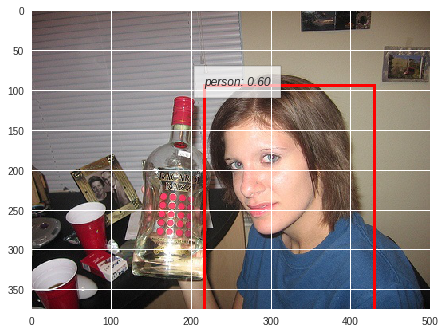

In [0]:
model = SSD300(n_fg_class=len(voc_bbox_label_names), pretrained_model='result/ssd/model_iter_2000')
#chainer.cuda.get_device_from_id(0).use()
#model.to_gpu()

img = utils.read_image('2007_000346.jpg', color=True)
bboxes, labels, scores = model.predict([img])
bbox, label, score = bboxes[0], labels[0], scores[0]

vis_bbox(img, bbox, label, score, label_names=voc_bbox_label_names)
plt.show()
